![](image_2.png)

# Business case study : OLA - Ensemble Learning


**Business Problem-**

    predict whether a driver will be leaving the company or not based on their attributes like

        Demographics (city, age, gender etc.)
        
        Tenure information (joining date, Last Date)
        
        Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, 
        
        Income)

        

_**Importing Python Libraries necessary while carrying out data exploration & visualisation**_ -
    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder   # Label Encoder
from sklearn.preprocessing import MinMaxScaler    # Min Max Scaling
from sklearn.preprocessing import StandardScaler  # Standard Scaling
from sklearn.impute import KNNImputer

from sklearn.preprocessing import PolynomialFeatures   # Polynomial Feature
from sklearn.model_selection import train_test_split   # train_test_split
from sklearn.model_selection import KFold, cross_validate

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report # Confusion matrix and display
from sklearn.metrics import precision_score, recall_score, f1_score   # Precision, recall, f1 score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score   # ROC & AUC score, curve
from sklearn.metrics import precision_recall_curve, auc 

from imblearn.over_sampling import SMOTE  # SMOTE (To handle imbalance data)

## Bagging - Random Forest
from sklearn.ensemble import RandomForestClassifier   # RF Classifier
from sklearn.model_selection import GridSearchCV   # Grid search
from sklearn.model_selection import RandomizedSearchCV   # Randomized search

## Boosting - GBDT
from sklearn.ensemble import GradientBoostingClassifier  # GBDT

## XGBoost
from xgboost import XGBClassifier

## LightGBM -
import lightgbm as lgb   # LightGBM




_**Upload & read csv file in pandas dataframe**_ -
    

In [2]:
ola = pd.read_csv("ola.csv")


In [3]:
ola.head()


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
ola.tail()


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2
19103,19103,12/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,411480,2



--------

**Observations on -**

    1) shape of data
    
    2) data types
    

In [5]:
ola.shape


(19104, 14)

In [6]:
ola.size


267456

In [7]:
ola.columns


Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [8]:
ola.nunique()


Unnamed: 0              19104
MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [9]:
ola.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


    Comment -

        1) From above info, we need to convert some of the columns datatypes.
    
            For eg. Date of joing - from object to datetime.
    

---------------------

**Droping Unwanted Columns -**

    Let's Drop the column which are not significant - 
    

In [10]:
ola = ola.drop("Unnamed: 0", axis = 1)


In [11]:
ola.head(2)


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2


-------

**Conversion of Datatypes -**


In [12]:
ola["MMM-YY"] = pd.to_datetime(ola["MMM-YY"])


In [13]:
ola["Dateofjoining"] = pd.to_datetime(ola["Dateofjoining"])


In [14]:
ola["LastWorkingDate"] = pd.to_datetime(ola["LastWorkingDate"])


In [15]:
ola.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

--------

**Check for duplicates & Missing Values -**


In [16]:
# Duplicate values -

ola[ola.duplicated()]


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating


    Comment -
    
        No Duplicate values present in dataset.
        

In [17]:
# Missing values -

round((ola.isnull().sum() * 100) / (len(ola)),2)


MMM-YY                   0.00
Driver_ID                0.00
Age                      0.32
Gender                   0.27
City                     0.00
Education_Level          0.00
Income                   0.00
Dateofjoining            0.00
LastWorkingDate         91.54
Joining Designation      0.00
Grade                    0.00
Total Business Value     0.00
Quarterly Rating         0.00
dtype: float64

    Comments -
    
        Age, Gender & Last working date columns have missing values.
        

--------

**Missing value Treatment - KNN Imputation**


In [18]:
num_cols = ola[["Driver_ID", "Age", "Gender", "Education_Level", "Income", "Joining Designation", "Grade", 
                "Total Business Value", "Quarterly Rating"]]

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(num_cols)
new_data = imputer.transform(num_cols)


In [19]:
ola1 = pd.DataFrame(new_data)


In [20]:
ola1.columns = num_cols.columns


In [21]:
ola1.isnull().sum()


Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

    Comments -
        
        Null values are imputed using KNN Imputer.
        

**Adding remaining columns to new dataframe -**


In [22]:
remaining_cols = ola[["MMM-YY", "City", "Dateofjoining", "LastWorkingDate"]]
remaining_cols


,MMM-YY,City,Dateofjoining,LastWorkingDate
0,2019-01-01,C23,2018-12-24,NaT
1,2019-02-01,C23,2018-12-24,NaT
2,2019-03-01,C23,2018-12-24,2019-03-11
3,2020-11-01,C7,2020-11-06,NaT
4,2020-12-01,C7,2020-11-06,NaT
...,...,...,...,...
19099,2020-08-01,C27,2020-06-08,NaT
19100,2020-09-01,C27,2020-06-08,NaT
19101,2020-10-01,C27,2020-06-08,NaT
19102,2020-11-01,C27,2020-06-08,NaT


In [23]:
new_ola = pd.concat([ola1, remaining_cols], axis = 1)


In [24]:
new_ola


,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,City,Dateofjoining,LastWorkingDate
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,C23,2018-12-24,NaT
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,C23,2018-12-24,NaT
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,C23,2018-12-24,2019-03-11
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,C7,2020-11-06,NaT
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,C7,2020-11-06,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,2020-08-01,C27,2020-06-08,NaT
19100,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,2020-09-01,C27,2020-06-08,NaT
19101,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,2020-10-01,C27,2020-06-08,NaT
19102,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,2020-11-01,C27,2020-06-08,NaT


----------

**Data Preprocessing -**


**Feature Engineering -**

    1) First, we will create unique rows of all Driver ID's


In [25]:
aggregation = {
    
                "Age"      : "max",
                "Gender"   : "first",
                "Education_Level" : "last",
                "Income" : "last",
                "Joining Designation" :"last",
                "Grade"  : "last",
                "Total Business Value" : "sum",
                "Quarterly Rating" : "last",
                "City" : "first",
                "Dateofjoining" : "last",
                "LastWorkingDate" : "last"    
    
                }

In [26]:
df = new_ola.groupby( ["Driver_ID", "MMM-YY"]).agg(aggregation).sort_index(ascending = [True, True])
df.head()


Age  Gender  Education_Level   Income  \
Driver_ID MMM-YY                                               
1.0       2019-01-01  28.0     0.0              2.0  57387.0   
          2019-02-01  28.0     0.0              2.0  57387.0   
          2019-03-01  28.0     0.0              2.0  57387.0   
2.0       2020-11-01  31.0     0.0              2.0  67016.0   
          2020-12-01  31.0     0.0              2.0  67016.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1.0       2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2.0       2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   

                      Quarterly Rating City Dateofjoining LastWorkingDate  
Driver_ID MMM-YY                                                           
1.0       2019-01-01               2.0  C23    2018-12-24             NaT  
          2019-02-01               2.0  C23    2018-12-24             NaT  
          2019-03-01               2.0  C23    2018-12-24      2019-03-11  
2.0       2020-11-01               1.0   C7    2020-11-06             NaT  
          2020-12-01               1.0   C7    2020-11-06             NaT

In [27]:
new_df = pd.DataFrame()


In [28]:
new_df["Driver_ID"] = new_ola["Driver_ID"].unique()


In [29]:
new_df["Age"] = list(df.groupby("Driver_ID").max("Age")["Age"])

new_df["Gender"] = list(df.groupby("Driver_ID").agg({"Gender":"last"})["Gender"])

new_df["Education_Level"] = list(df.groupby("Driver_ID").agg({"Education_Level":"last"})["Education_Level"])

new_df["Income"] = list(df.groupby("Driver_ID").agg({"Income":"last"})["Income"])

new_df["Joining Designation"] = list(df.groupby("Driver_ID").agg({"Joining Designation":"last"})
                                     ["Joining Designation"])

new_df["Grade"] = list(df.groupby("Driver_ID").agg({"Grade":"last"})["Grade"])

new_df["Total Business Value"] = list(df.groupby("Driver_ID").agg({"Total Business Value":"sum"})
                                      ["Total Business Value"])

new_df["Quarterly Rating"] = list(df.groupby("Driver_ID").agg({"Quarterly Rating":"last"})["Quarterly Rating"])

new_df["City"] = list(df.groupby("Driver_ID").agg({"City":"last"})["City"])



In [30]:
new_df.head()


,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,C23
1,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7
2,4.0,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,C13
3,5.0,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,C9
4,6.0,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,C11


In [31]:
new_df.shape


(2381, 10)

    2) Create a column which tells whether the quarterly rating has increased for that driver - 
    
        for those whose quarterly rating has increased we assign the value 1.
        

In [32]:
first_quarter = df.groupby("Driver_ID").agg( {"Quarterly Rating" : "first"} )

last_quarter = df.groupby("Driver_ID").agg( {"Quarterly Rating" : "last"} )

diff = (last_quarter["Quarterly Rating"] > first_quarter["Quarterly Rating"]).reset_index()


In [33]:
empid = diff[diff["Quarterly Rating"] == True]["Driver_ID"]


    Now adding this id's to main dataframe i.e new_df -
    

In [34]:
result = []

for i in new_df["Driver_ID"]:
    if i in empid.values:
        result.append(1)
    else:
        result.append(0)
        

In [35]:
new_df["Promotion"] = result


In [36]:
new_df.head()


,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,Promotion
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,C23,0
1,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,0
2,4.0,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,C13,0
3,5.0,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,C9,0
4,6.0,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,C11,1


    3) Target variable creation: Create a column called target which tells whether the driver has left the company- 
    
        driver whose last working day is present will have the value 1
        

In [37]:
last_day = df.groupby("Driver_ID").agg( {"LastWorkingDate" : "last"})["LastWorkingDate"].isna().reset_index()

ld = last_day[last_day["LastWorkingDate"] == True]["Driver_ID"]

target = []

for i in new_df["Driver_ID"]:
    if i in ld.values:
        target.append(0)
    else:
        target.append(1)


In [38]:
new_df["target"] = target


In [39]:
new_df.head()


,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,Promotion,target
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,C23,0,1
1,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,0,0
2,4.0,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,C13,0,1
3,5.0,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,C9,0,1
4,6.0,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,C11,1,0


    4) Create a column which tells whether the monthly income has increased for that driver - 
    
        for those whose monthly income has increased we assign the value 1
        

In [40]:
first_month = df.groupby("Driver_ID").agg( {"Income" : "first"} )

last_month = df.groupby("Driver_ID").agg( {"Income" : "last"} )

increased_salary = (last_month["Income"] > first_month["Income"]).reset_index()

empid = increased_salary[increased_salary["Income"] == True]["Driver_ID"]

income = []

for i in new_df["Driver_ID"]:
    if i in empid.values:
        income.append(1)
    else:
        income.append(0)


In [41]:
new_df["Increased_Salary"] = income


In [42]:
new_df.head()


,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,Promotion,target,Increased_Salary
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,C23,0,1,0
1,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,0,0,0
2,4.0,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,C13,0,1,0
3,5.0,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,C9,0,1,0
4,6.0,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,C11,1,0,0



-----------

**Statistical Summary -**



In [43]:
new_df.describe()


,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Promotion,target,Increased_Salary
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.770265,0.410584,1.00756,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,0.150357,0.678706,0.018060
std,806.161628,5.932235,0.491359,0.81629,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.357496,0.467071,0.133195
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,30.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,1.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,0.000000,1.000000,0.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000


In [44]:
new_df.describe(include = "object")


,City
count,2381
unique,29
top,C20
freq,152


        Comments -
  
        1) 75% drivers monthly income is <= 75986.
        
        2) 75% drivers acquired 4173650 as total business values.
        
        3) There are total of 2831 different drivers data.
    
        4) Age of drivers range from 21years to 58years.
        

    

**Non Graphical Analysis -**


In [45]:
# Gender -

new_df["Gender"].value_counts()


0.0    1400
1.0     974
0.6       5
0.2       1
0.4       1
Name: Gender, dtype: int64

    We are removing non relevant gender. 
    

In [46]:
new_df = new_df[(new_df["Gender"] == 0.0) | (new_df["Gender"] == 1.0)]


In [47]:
new_df["Gender"].value_counts()

0.0    1400
1.0     974
Name: Gender, dtype: int64

    Comments -
    
        1) Male Drivers are more in number as compared to Female drivers.
        


In [48]:
# Education Level -

new_df["Education_Level"].value_counts()


2.0    798
1.0    794
0.0    782
Name: Education_Level, dtype: int64

    Comments -
    
        1) Majority of drivers have completed their Graduation.
        

In [49]:
# Target -

new_df["target"].value_counts(normalize = True) * 100


1    67.944398
0    32.055602
Name: target, dtype: float64

    Comments -
        
        1) Nearly 68% of the drivers have churned.
        

In [50]:
# Joining Designation -

new_df["Joining Designation"].value_counts(normalize = True) * 100


1.0    43.049705
2.0    34.288121
3.0    20.682393
4.0     1.516428
5.0     0.463353
Name: Joining Designation, dtype: float64

    Comments -
        
        1) 43% of the drivers have joining designation 1.0
        

In [51]:
# Grade -

new_df["Grade"].value_counts(normalize = True) * 100


2.0    35.973041
1.0    31.044650
3.0    26.158382
4.0     5.812974
5.0     1.010952
Name: Grade, dtype: float64

    Comments -
    
        1) grade 1.0, 2.0, 3.0 drivers are more in number.
        

In [52]:
# Quarterly Rating -

new_df["Quarterly Rating"].value_counts(normalize = True) * 100


1.0    73.336142
2.0    15.248526
3.0     6.908172
4.0     4.507161
Name: Quarterly Rating, dtype: float64

    Comments -
        
        1) Drivers with quarterly rating 1.0 are more in number.
        

In [53]:
# Promotion -

new_df["Promotion"].value_counts(normalize = True) * 100


0    85.088458
1    14.911542
Name: Promotion, dtype: float64

    Comments -
    
        1) 85% of the drivers quarterly rating are unchanged.
        

In [54]:
# City -

new_df["City"].value_counts(normalize = True) * 100


C20    6.402696
C15    4.128054
C29    4.043808
C26    3.917439
C8     3.748947
C27    3.748947
C10    3.622578
C16    3.538332
C28    3.454086
C3     3.454086
C12    3.411963
C22    3.411963
C1     3.369840
C5     3.369840
C21    3.327717
C6     3.285594
C14    3.285594
C4     3.243471
C7     3.201348
C9     3.159225
C25    3.117102
C23    3.117102
C24    3.032856
C2     3.032856
C17    2.990733
C19    2.990733
C13    2.990733
C18    2.906487
C11    2.695872
Name: City, dtype: float64


---------

**Graphical Analysis -**


    1) Univariate Analysis -
    

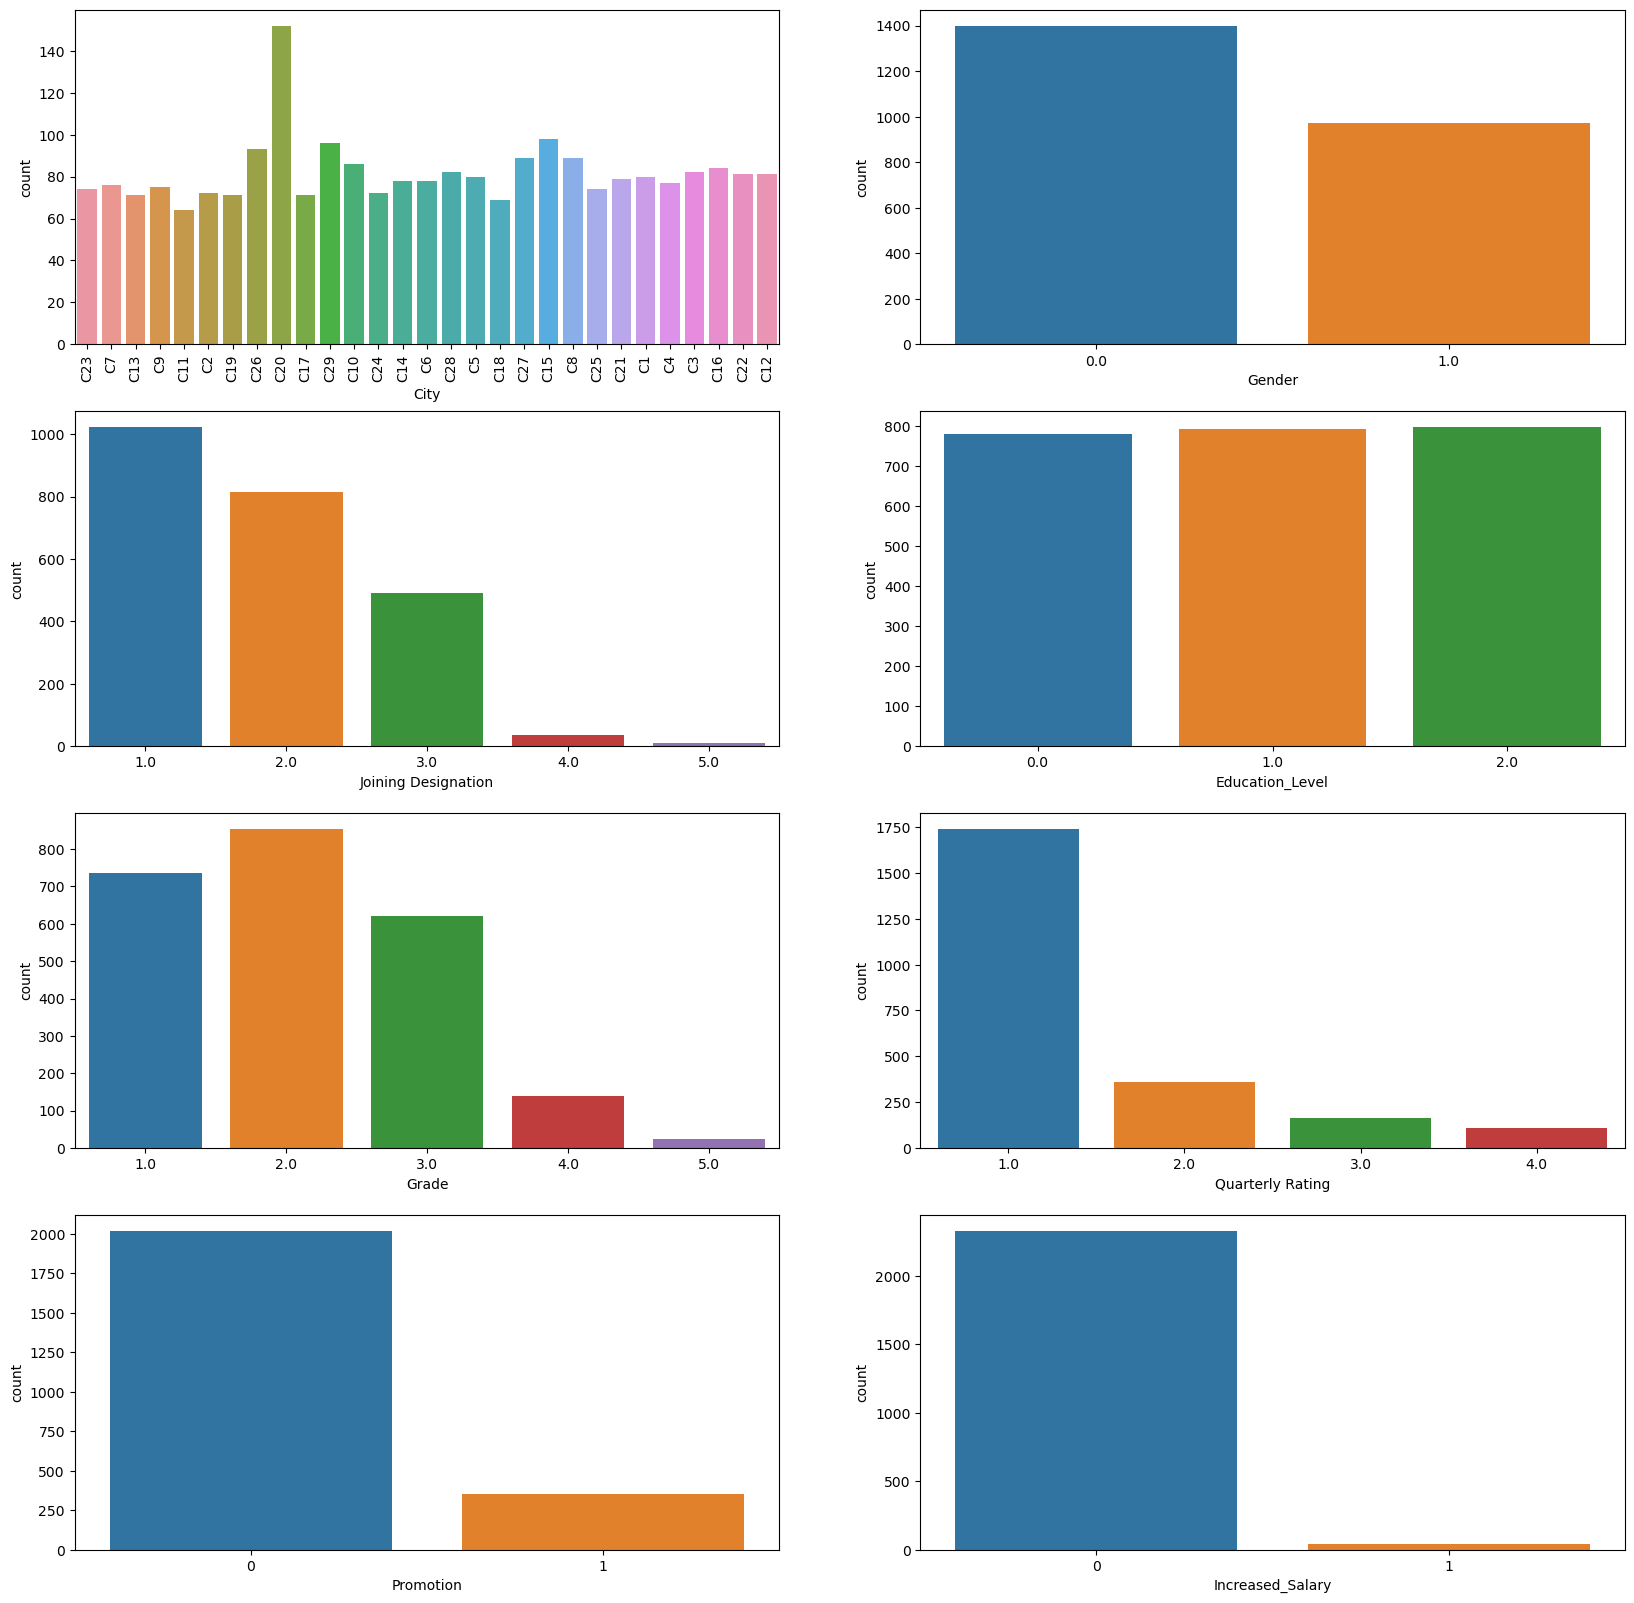

In [55]:
plt.figure(figsize = (20, 20))

plt.subplot(421)
sns.countplot(data = new_df, x = "City")
plt.xticks(rotation = 90)

plt.subplot(422)
sns.countplot(data = new_df, x = "Gender")

plt.subplot(423)
sns.countplot(data = new_df, x = "Joining Designation")

plt.subplot(424)
sns.countplot(data = new_df, x = "Education_Level")

plt.subplot(425)
sns.countplot(data = new_df, x = "Grade")

plt.subplot(426)
sns.countplot(data = new_df, x = "Quarterly Rating")

plt.subplot(427)
sns.countplot(data = new_df, x = "Promotion")

plt.subplot(428)
sns.countplot(data = new_df, x = "Increased_Salary")

plt.show()


    Comments -
    
        1) 152 employees are from city C20 and 101 from city C15.
        
        2) 1404 employees are of the Male gender and 977 are females.
        
        3) 1026 joined with the grade as 1, 815 employees joined with the grade 2.
        
        4) 802 employees have their education as Graduate and 795 have completed their 12.
        
        5) 855 employees had their designation as 2 at the time of reporting.
        
        6) 1744 employees had their Quarterly Rating as 1.
        
        7) the quarterly rating has not increased for 2076 employees.
        
        8) 2331 employees salary is unchanged.
        

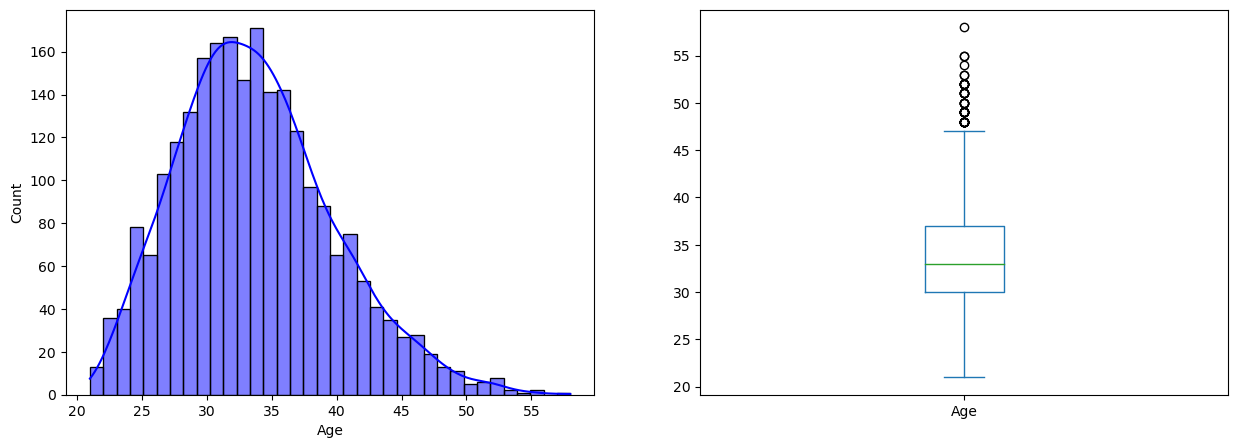

In [56]:
plt.figure(figsize = (15, 5))

plt.subplot(121)
sns.histplot(data = new_df, x = "Age", kde = True, color = "Blue")

plt.subplot(122)
new_df["Age"].plot.box()

plt.show()


    Comments -
    
        Slight skewness towards right side indicates presence of outliers.
        

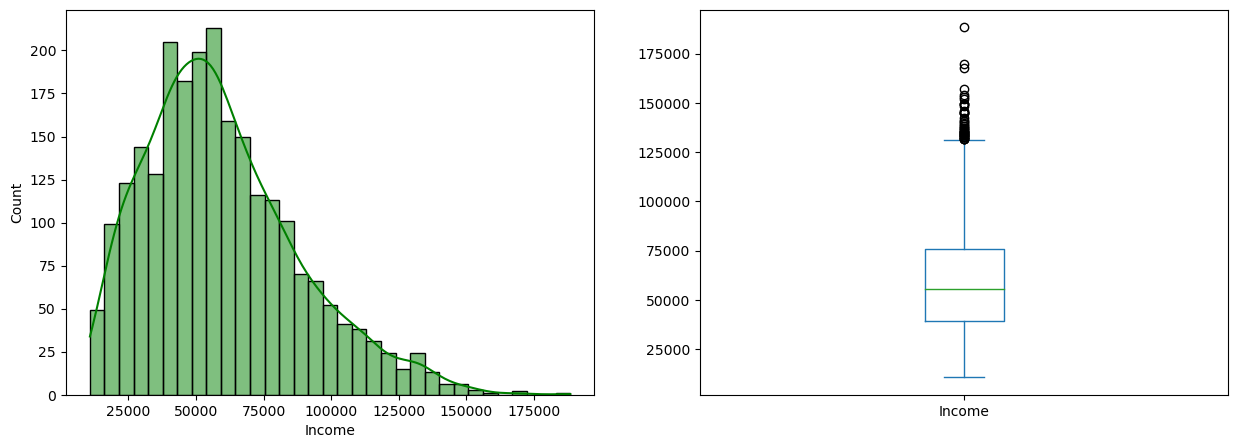

In [57]:
plt.figure(figsize = (15, 5))

plt.subplot(121)
sns.histplot(data = new_df, x = "Income", kde = True, color = "Green")

plt.subplot(122)
new_df["Income"].plot.box()

plt.show()


    Comments -
    
        1) Skewness towards right side indicates presence of outliers.
        

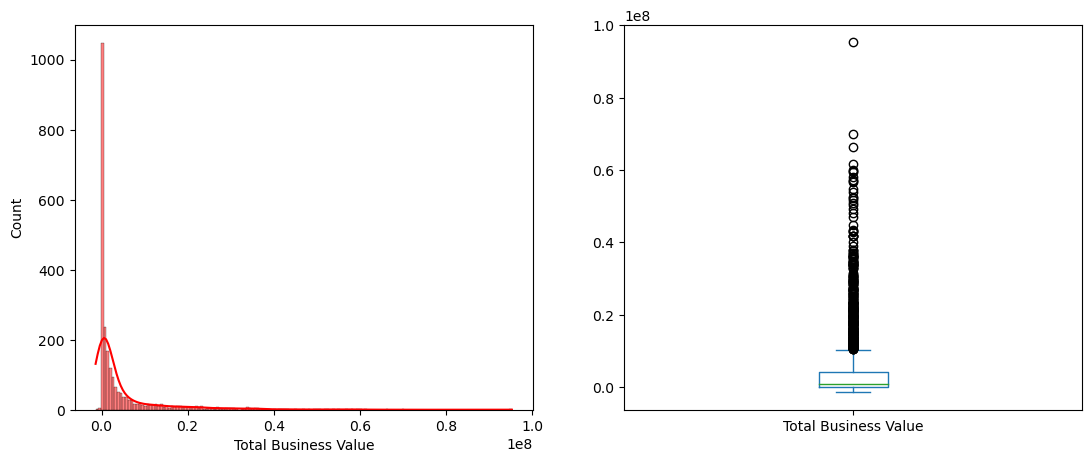

In [58]:
plt.figure(figsize = (13, 5))

plt.subplot(121)
sns.histplot(data = new_df, x = "Total Business Value", kde = True, color = "Red")

plt.subplot(122)
new_df["Total Business Value"].plot.box()

plt.show()

    Comments -
    
        1) Skewness towards right side indicates presence of outliers.
        


    2) Bivariate Analysis -
    

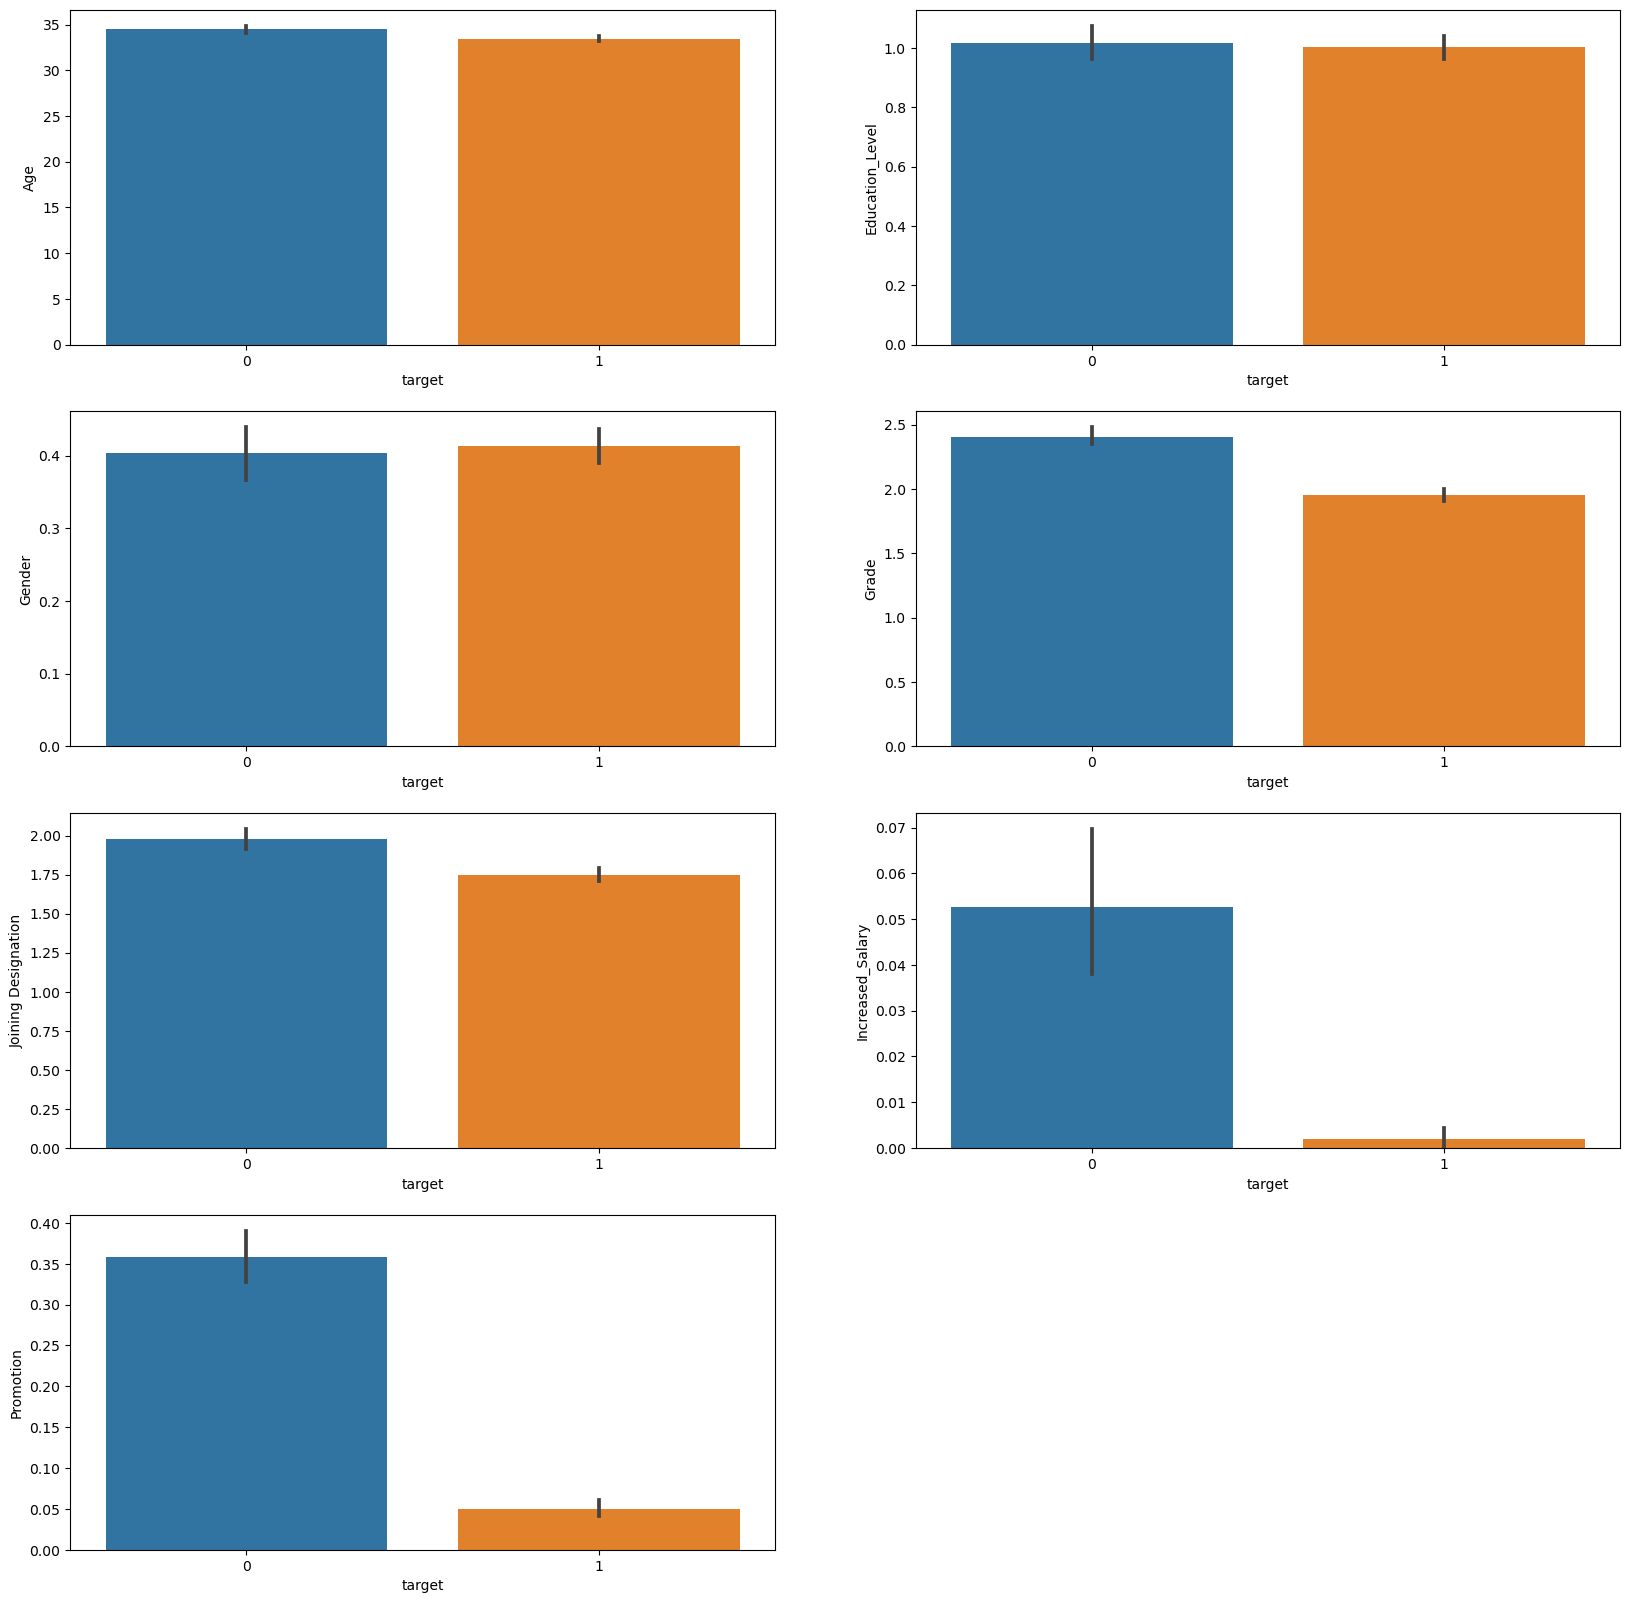

In [59]:
plt.figure(figsize = (20, 20))

plt.subplot(421)
sns.barplot(data = new_df, x = "target", y = "Age")

plt.subplot(422)
sns.barplot(data = new_df, x = "target", y = "Education_Level")

plt.subplot(423)
sns.barplot(data = new_df, x = "target", y = "Gender")

plt.subplot(424)
sns.barplot(data = new_df, x = "target", y = "Grade")

plt.subplot(425)
sns.barplot(data = new_df, x = "target", y = "Joining Designation")

plt.subplot(426)
sns.barplot(data = new_df, x = "target", y = "Increased_Salary")

plt.subplot(427)
sns.barplot(data = new_df, x = "target", y = "Promotion")

plt.show()


    Comments -
    
        1) For both the employees who left the company and the ones who stayed, 
        
            the percentages of age, gender, and education are roughly equal.

        2) Workers who were rated as 3 or 4 when they first joined the company are less likely to quit.

        3) There is a lower likelihood of employee turnover among those whose quarterly rating has improved.

        4) Workers who do not receive a raise in their monthly compensation are more likely to quit the company.
        

    3) Multivariate Analysis - To find out the correlation amongst different features.
    

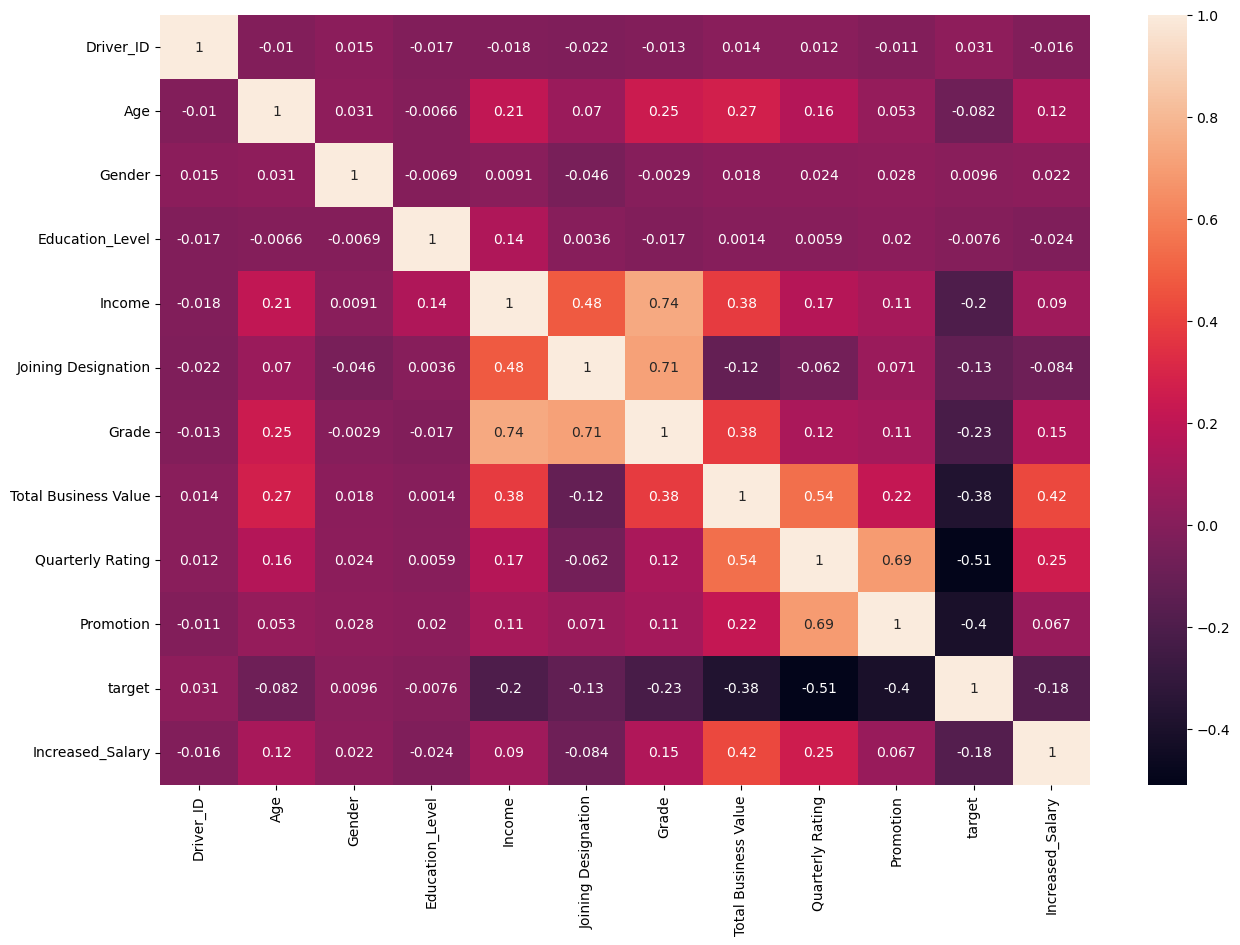

In [60]:
plt.figure(figsize = (15, 10))
sns.heatmap(new_df.corr(method = "pearson"), annot = True)
plt.show()


    Comments -
    
        1) Grades and income have a strong correlation.

        2) Grade and Joining Designation have a strong correlation.
        
        3) Total Business value and salary increament is correlated.
        


----------

**Encoding -**


    Here in recent dataframe, only city column is in object form.
    
    By using regex, we can remove initial character 'c' of city column.
    

In [61]:
new_df["City"] = new_df["City"].astype('str').str.extractall( '(\d+)').unstack().fillna('').sum(axis = 1).astype('int')


In [62]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2374 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_ID             2374 non-null   float64
 1   Age                   2374 non-null   float64
 2   Gender                2374 non-null   float64
 3   Education_Level       2374 non-null   float64
 4   Income                2374 non-null   float64
 5   Joining Designation   2374 non-null   float64
 6   Grade                 2374 non-null   float64
 7   Total Business Value  2374 non-null   float64
 8   Quarterly Rating      2374 non-null   float64
 9   City                  2374 non-null   int32  
 10  Promotion             2374 non-null   int64  
 11  target                2374 non-null   int64  
 12  Increased_Salary      2374 non-null   int64  
dtypes: float64(9), int32(1), int64(3)
memory usage: 250.4 KB


---------

**Standardization & Train-test Split -**


In [63]:
#Standardization -

X = new_df.drop( ['Driver_ID', "target", "City"], axis = 1)
X_cols = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [64]:
X = pd.DataFrame(X)

X.columns = X_cols

X.head()


,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Promotion,Increased_Salary
0,0.189189,0.0,1.0,0.262508,0.00,0.00,0.032064,0.333333,0.0,0.0
1,0.270270,0.0,1.0,0.316703,0.25,0.25,0.014326,0.000000,0.0,0.0
2,0.594595,0.0,1.0,0.308750,0.25,0.25,0.017944,0.000000,0.0,0.0
3,0.216216,0.0,0.0,0.200489,0.00,0.00,0.015570,0.000000,0.0,0.0
4,0.270270,1.0,0.5,0.382623,0.50,0.50,0.027405,0.333333,1.0,0.0


In [65]:
# Train-test Split -

y = new_df["target"]


In [66]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5, shuffle = True)


In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1899, 10), (475, 10), (1899,), (475,))

---------

**Data Balancing using SMOTE -**



In [68]:
sum(y_train == 1)


1300

In [69]:
sum(y_train == 0)


599

    Comments -
    
        Here, we can see that data is slightly imbalanced. We can use SMOTE here, to remove imbalance data problem.
        

In [70]:
sm = SMOTE(random_state = 5)
X_train, y_train = sm.fit_resample(X_train, y_train)


In [71]:
sum(y_train == 1)


1300

In [72]:
sum(y_train == 0)


1300

In [73]:
X_train.shape, y_train.shape


((2600, 10), (2600,))

---------

**Ensemble Learning - Bagging**


In [74]:
params = {
            "max_depth" : [2, 3, 4],
            "n_estimators" : [50, 100, 150, 200]
          }


In [75]:
random_forest = RandomForestClassifier()

grid = GridSearchCV(estimator = random_forest,
                   param_grid = params,
                   scoring = "f1", cv = 3, n_jobs = -1)


In [76]:
grid.fit(X_train, y_train)

print("Best Params ", grid.best_params_)
print("Best score ", grid.best_score_)


Best Params  {'max_depth': 4, 'n_estimators': 200}
Best score  0.7807861903395041


In [77]:
y_pred = grid.predict(X_test)


In [78]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.61      0.69       162
           1       0.82      0.92      0.87       313

    accuracy                           0.81       475
   macro avg       0.81      0.76      0.78       475
weighted avg       0.81      0.81      0.81       475



In [79]:
cm = confusion_matrix(y_test, y_pred)


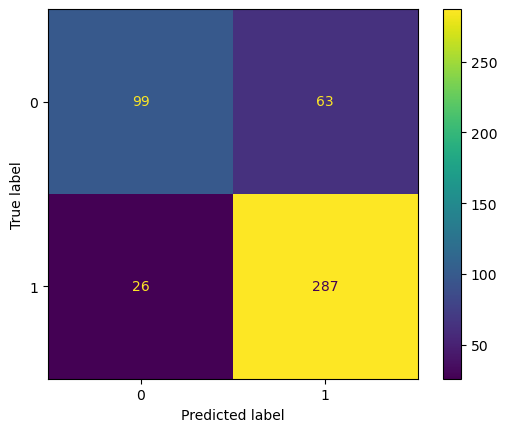

In [80]:
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = grid.classes_).plot()


    Comments -
    
        1) Out of all prediction, the measure for correctly predicted 0 is 80% and for 1 is 82% (Precision)
        
        2) Out of all actual 0, the measure for correctly predicted is 61% and for 1 is 92% (Recall)
        
        3) F1 Score of 0 is 69% & F1 Score of 1 is 87%.
        

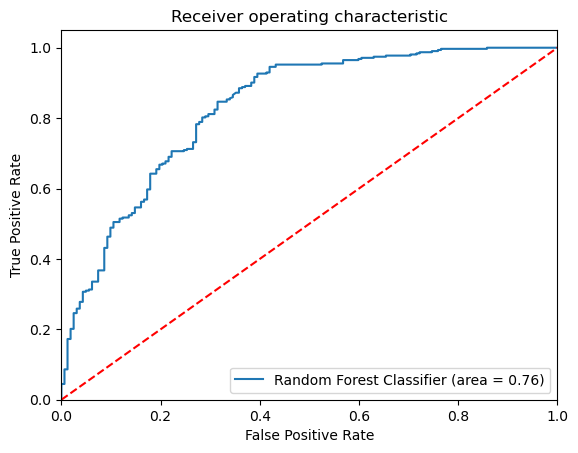

In [81]:
# ROC Curve -

logit_roc_auc = roc_auc_score(y_test,y_pred)

fpr,tpr,thresholds = roc_curve(y_test,grid.predict_proba(X_test)[:, 1])

plt.figure()

plt.plot(fpr,tpr,label = 'Random Forest Classifier (area = %0.2f)' % logit_roc_auc)

plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])

plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc = "lower right")

plt.show()


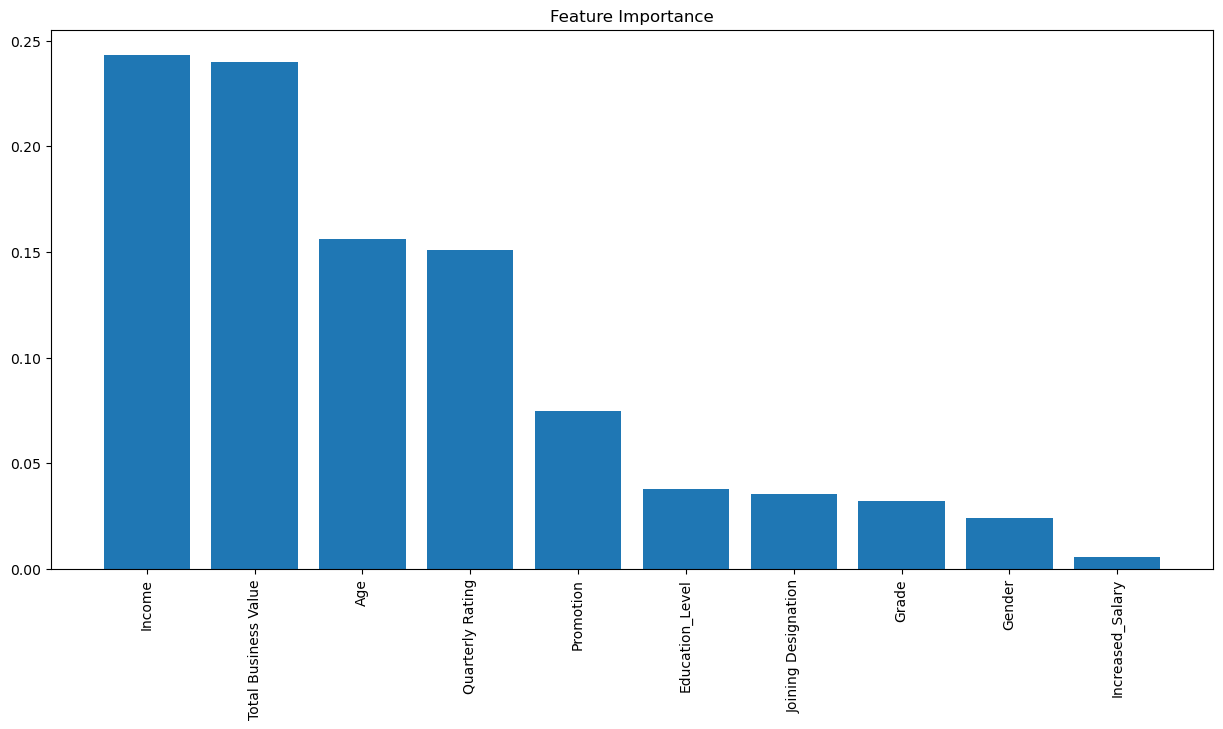

In [82]:
# Feature Importance -
random_forest.fit(X, y)
importances = random_forest.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot


    Comments -
    
        1) Income & Total Business Value are the most important features.
        

----------

**Ensemble Learning - Boosting (GBDT)**


In [97]:
params = {
    "max_depth": [2, 3, 4],
    "loss": ["log_loss", "exponential"],
    "subsample": [0.1, 0.2, 0.5, 0.8, 1],
    "learning_rate": [0.1, 0.2, 0.3],
    "n_estimators": [50,100,150,200]
}

gbdt = GradientBoostingClassifier()


In [98]:
c = GridSearchCV(estimator = gbdt, cv = 3, n_jobs = -1, verbose = True, param_grid = params)

c.fit(X_train, y_train)

print("Best Params: ", c.best_params_)
print("Best Score: ", c.best_score_)


Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best Params:  {'learning_rate': 0.3, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best Score:  0.8015495017460862


In [99]:
y_pred = c.predict(X_test)


In [100]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.63      0.69       162
           1       0.82      0.89      0.86       313

    accuracy                           0.80       475
   macro avg       0.79      0.76      0.77       475
weighted avg       0.80      0.80      0.80       475



In [101]:
cm = confusion_matrix(y_test, y_pred)


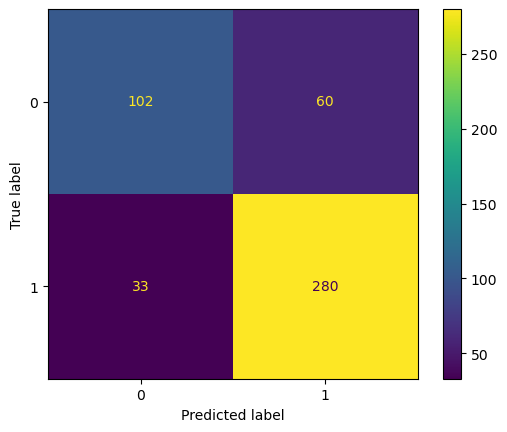

In [102]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=c.classes_).plot()


    Comments -
    
        1) Out of all prediction, the measure for correctly predicted 0 is 71% and for 1 is 83% (Precision)
        
        2) Out of all actual 0, the measure for correctly predicted is 65% and for 1 is 87% (Recall)
        
        3) F1 Score of 0 is 68% & F1 Score of 1 is 85%.
        

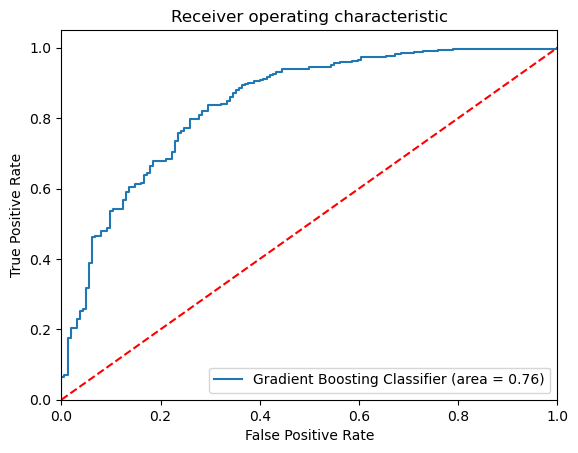

In [103]:
# ROC Curve -
logit_roc_auc = roc_auc_score(y_test,y_pred)

fpr,tpr,thresholds = roc_curve(y_test,c.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr,tpr,label = 'Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)

plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])

plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc = "lower right")

plt.show()


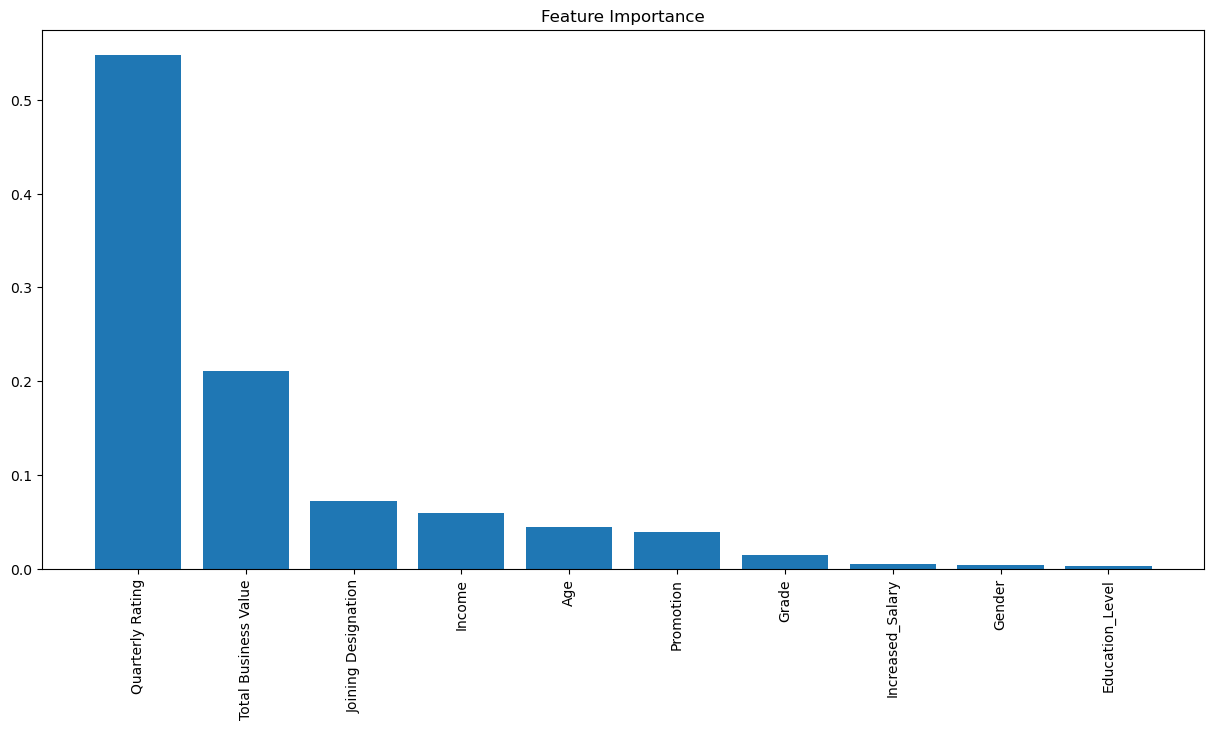

In [104]:
# Feature Importance -
gbdt.fit(X, y)
importances = gbdt.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot


    Comments -
    
        1) Quarterly Rating and Total Business values are the most important features.
        

------------

**XGBOOST Classifier -**


XGBoost Classifier Score:  0.7578947368421053

               precision    recall  f1-score   support

           0       0.66      0.60      0.63       162
           1       0.80      0.84      0.82       313

    accuracy                           0.76       475
   macro avg       0.73      0.72      0.73       475
weighted avg       0.75      0.76      0.76       475



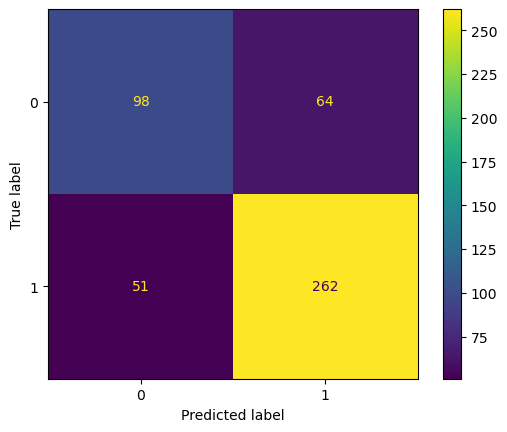

In [91]:
model = XGBClassifier(class_weight = "balanced")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("XGBoost Classifier Score: ", model.score(X_test, y_test))
print("\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_).plot()


    Comments -
    
        1) Out of all prediction, the measure for correctly predicted 0 is 66% and for 1 is 80% (Precision)
        
        2) Out of all actual 0, the measure for correctly predicted is 60% and for 1 is 84% (Recall)
        
        3) F1 Score of 0 is 63% & F1 Score of 1 is 82%.
        

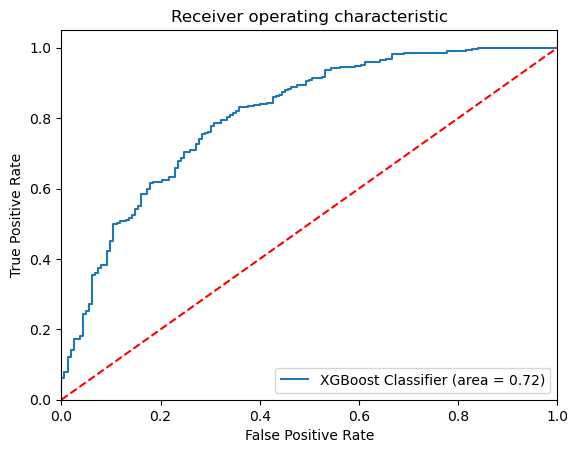

In [92]:
# ROC Curve -

logit_roc_auc = roc_auc_score(y_test,y_pred)

fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr,tpr,label = 'XGBoost Classifier (area = %0.2f)' % logit_roc_auc)

plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])

plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc = "lower right")

plt.show()


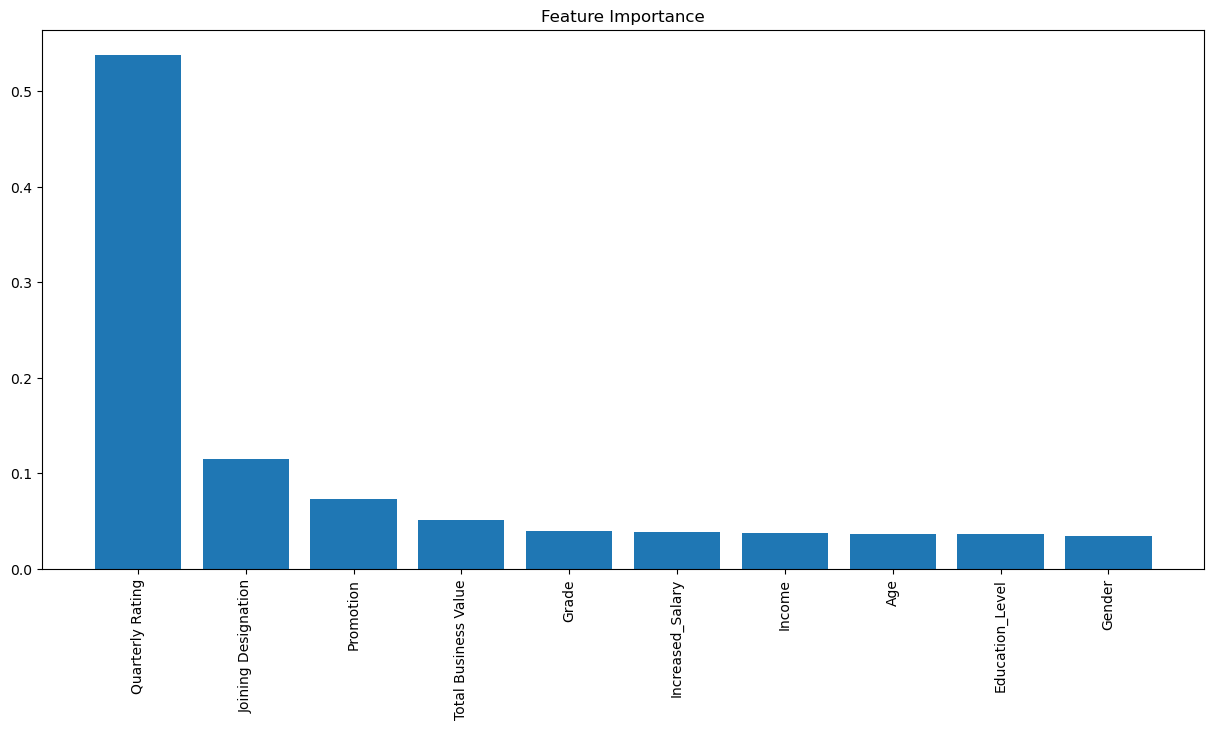

In [93]:
# Feature Importance -
model.fit(X, y)
importances = model.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot


    Comments -
    
        1) Quarterly Rating is the most important feature.
        

-------------

**Light GBM-**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1300, number of negative: 1300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 2600, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Light GBM Classifier Score:  0.7810526315789473

               precision    recall  f1-score   support

           0       0.69      0.64      0.67       162
           1       0.82      0.85      0.84       313

    accuracy                           0.78       475
   macro avg       0.76      0.75      0.75       475
weighted avg       0.78      0.78      0.78       475



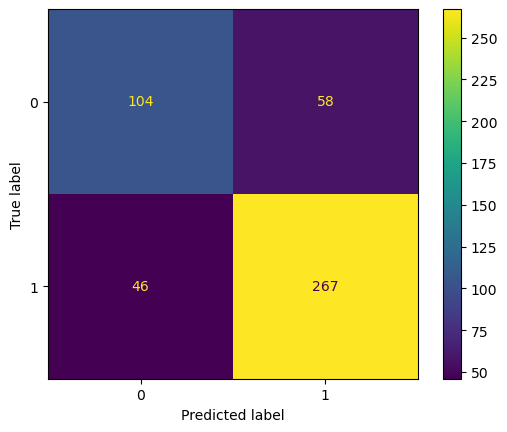

In [94]:
model1 = lgb.LGBMClassifier()

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
print("Light GBM Classifier Score: ", model1.score(X_test, y_test))
print("\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_).plot()


    Comments -
    
        1) Out of all prediction, the measure for correctly predicted 0 is 69% and for 1 is 82% (Precision)
        
        2) Out of all actual 0, the measure for correctly predicted is 64% and for 1 is 85% (Recall)
        
        3) F1 Score of 0 is 67% & F1 Score of 1 is 84%.
        

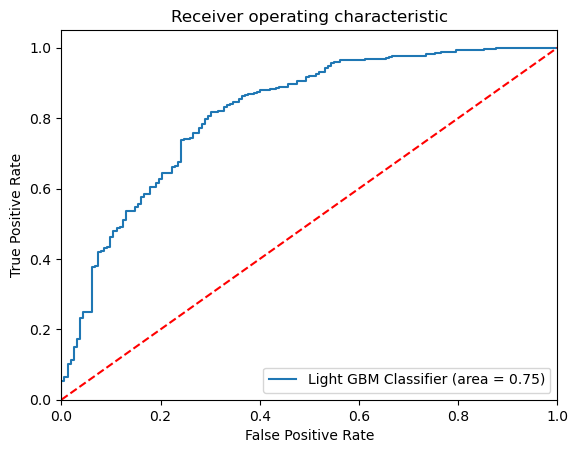

In [95]:
# ROC Curve -

logit_roc_auc = roc_auc_score(y_test,y_pred)

fpr,tpr,thresholds = roc_curve(y_test,model1.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr,tpr,label = 'Light GBM Classifier (area = %0.2f)' % logit_roc_auc)

plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])

plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc = "lower right")

plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1613, number of negative: 761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 2374, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.679444 -> initscore=0.751218
[LightGBM] [Info] Start training from score 0.751218


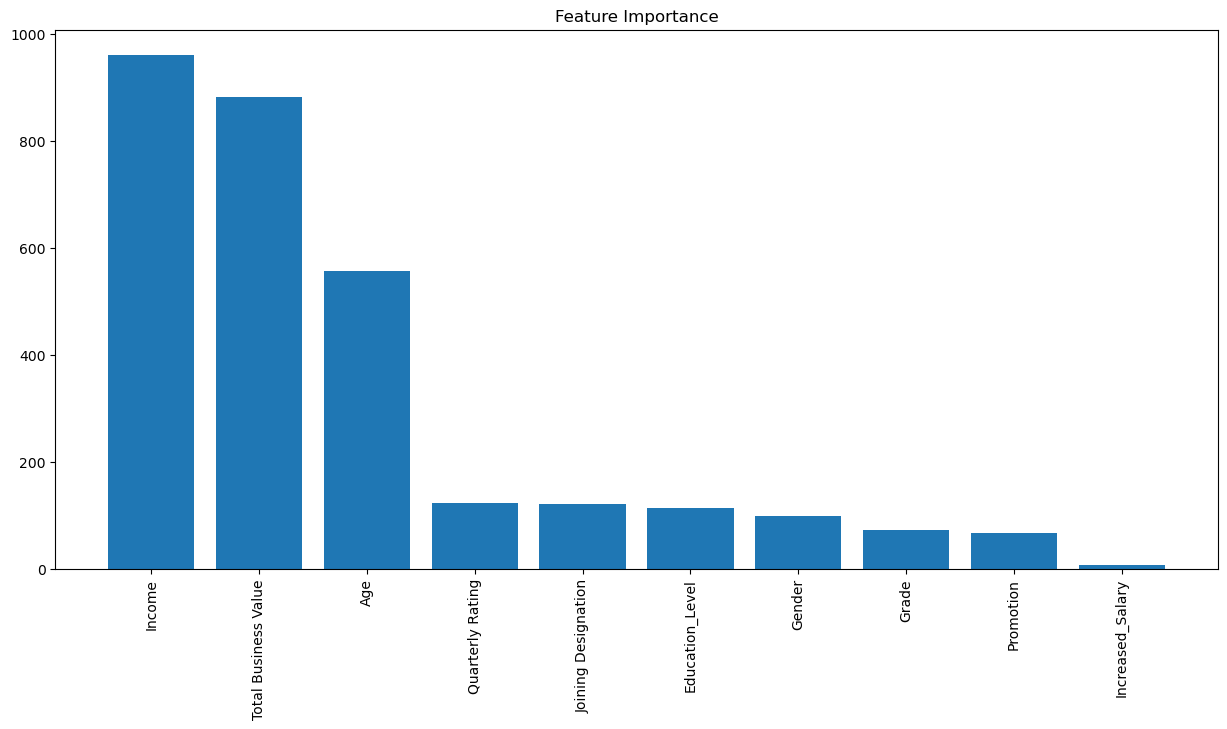

In [96]:
# Feature Importance -
model1.fit(X, y)
importances = model1.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot


    Comments -
    
        1) Income & Total Business Value are the most important features.
        

------------

**Actionable Insights & Recommendations -**


    Insights -
    
        1) It can be observed that 43% of the workforce is female and 57% is male.

        2) The proportions of workers with varying degrees of education are nearly same for both level 1 and level 2.

        3) 97.3% of the workers were not given raises.

        4) A little over 43% of the staff began at the lowest rank (1). 
        
           Twenty percent at level 3, 24% at level 2, and less than 2% at higher levels were members.

        5) Currently, designation level 2 is held by the majority of employees (35%) 
        
           and is followed by designation levels 1 (31%) and 3 (26%). 
           
           The present percentage of personnel with higher designations is less than 5%.

        6) Out of all the employees, 45.4% did not earn a promotion, while only 54.6% did. 
        
           But only 2.6% of them saw an increase in pay.    
    
    
    
    Recommendations -
    
        1) To stop churning, we must offer the drivers overtime pay or other benefits.

        2) The business must put in place a rewards program for customers who rate drivers and submit feedback.

        3) The company must contact the drivers whose monthly pay has not changed 
        
           and assist them in increasing their income by offering bonuses and other benefits.

        4) Drivers' lack of ratings is a problem that the company has to investigate.
    
        5) The three most significant features are Quarterly_Rating_Increased, Total_Business_Value, 
        
           and Last_Quarterly_Rating. The business must monitor these characteristics as predictors.

        6) We notice that the recall on target 0 is not particularly great, 
        
           which could be because of the tiny, uneven dataset. More information will resolve this problem.
    
     